In [1]:
from STL_to_path import *
from GPT import *
from NL_to_STL import *
from visualization import *

         Install drake (https://drake.mit.edu/installation.html)
         to use the Drake-based solvers.


In [5]:
T_max = 20          # time horizon in seconds 
dt = 0.2            # time step in seconds
N = int(T_max/dt)   # number of time steps
max_acc = 50        # maximum acceleration in m/s^2
max_speed = 1       # maximum speed in m/s

objects = {"key" : (3.75, 4.75, 3.75, 4.75, 1., 2.),
           "chest": (-4.25, -3, -4.5, -3.75, 0., 0.75),
           "door": (0., 0.5, -2.5, -1, 0., 2.5),
           "bounds": (-5., 5., -5., 5., 0., 3.),
           "NE_inside_wall": (2., 5., 3., 3.5, 0., 3.),
           "south_mid_inside_wall": (0., 0.5, -5., -2.5, 0., 3.),
           "north_mid_inside_wall": (0., 0.5, -1., 5., 0., 3.),
           "west_inside_wall": (-2.25, -1.75, -5., 3.5, 0., 3.),
           "above_door_wall": (0., 0.5, -2.5, -1, 2.5, 3.),
           }

x0 = np.array([3.,-4.,0.5,0.,0.,0.]) # initial state: x, y, z, vx, vy, vz

In [8]:
objects["key"]

(3.75, 4.75, 3.75, 4.75, 1.0, 2.0)

In [6]:
translator = NL_to_STL(objects, N, dt, print_instructions=True)

Instructions:  You are an assistant guiding a drone to perform an instruction specified by a user.
Your task is to take the user's instruction and translate it into a specification in Signal Temporal Logic (STL).
You are provided with a dictionary of objects in the scene, the available Logic functions, and Logic operators that you can use in your generated STL specification. All of these are provided below.

Objects:
{'key': (3.75, 4.75, 3.75, 4.75, 1.0, 2.0), 'chest': (-4.25, -3, -4.5, -3.75, 0.0, 0.75), 'door': (0.0, 0.5, -2.5, -1, 0.0, 2.5), 'bounds': (-5.0, 5.0, -5.0, 5.0, 0.0, 3.0), 'NE_inside_wall': (2.0, 5.0, 3.0, 3.5, 0.0, 3.0), 'south_mid_inside_wall': (0.0, 0.5, -5.0, -2.5, 0.0, 3.0), 'north_mid_inside_wall': (0.0, 0.5, -1.0, 5.0, 0.0, 3.0), 'west_inside_wall': (-2.25, -1.75, -5.0, 3.5, 0.0, 3.0), 'above_door_wall': (0.0, 0.5, -2.5, -1, 2.5, 3.0)}

Logic functions: 
"STL_formulas.inside_cuboid(object)", "STL_formulas.outside_cuboid(object)"

Logic operators:
"&", "|"

STL spe

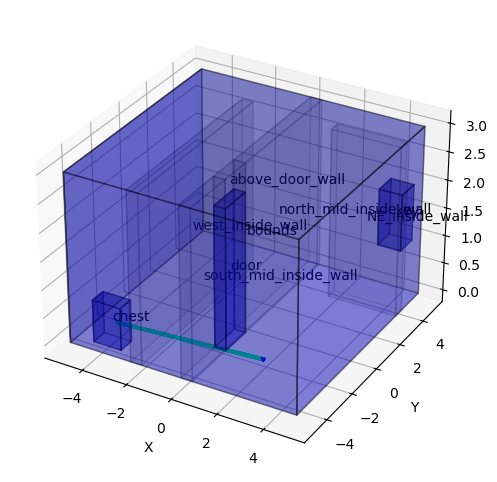

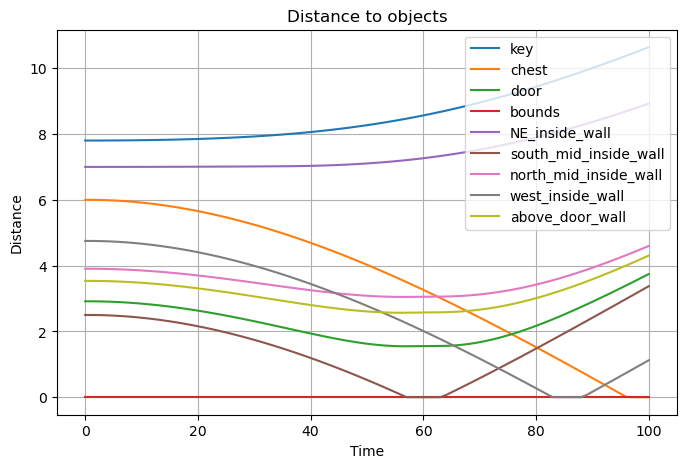

Please specify the task. Type 'quit' to exit conversation.
Assistant: <STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["key"]).eventually(0, 100)>
The final specification was generated. Exiting conversation.
Solving for spec  1  of  1
Current x0:  [-3.375      -4.125       0.375      -0.48052764 -0.00942211 -0.00942211]
Current spec:  STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["key"]).eventually(0, 100)
Setting up optimization problem...
Setup complete in 5.111994743347168 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Opti

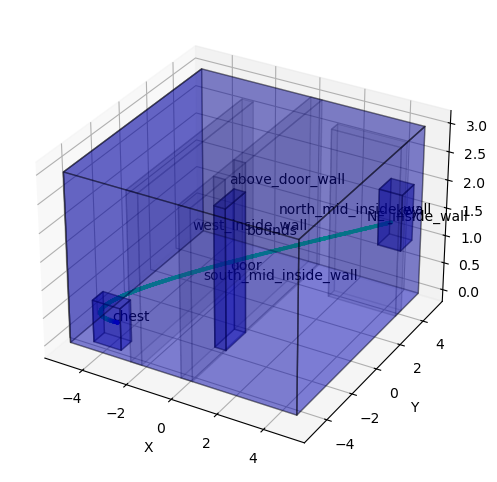

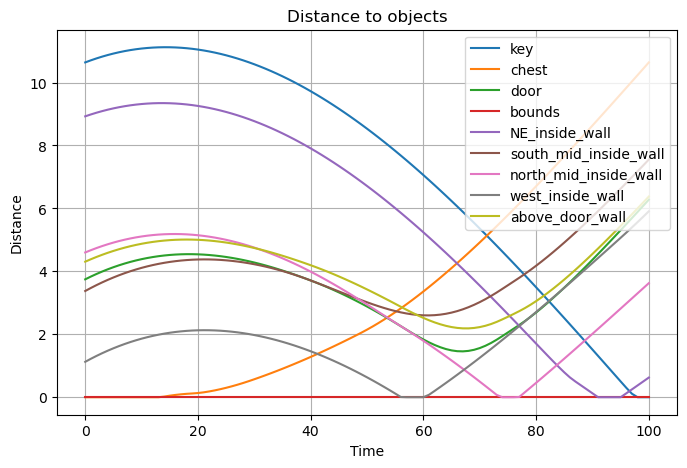

Please specify the task. Type 'quit' to exit conversation.
Assistant: <STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["key"]).eventually(0, 100) & STL_formulas.inside_cuboid((-2, 2, -2, 2, 0, 1)).eventually(0, 100)>
The final specification was generated. Exiting conversation.
Solving for spec  1  of  1
Current x0:  [4.125      4.125      1.375      0.80921252 0.62664137 0.08015896]
Current spec:  STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 100) & STL_formulas.inside_cuboid(objects["key"]).eventually(0, 100) & STL_formulas.inside_cuboid((-2, 2, -2, 2, 0, 1)).eventually(0, 100)
Setting up optimization problem...
Setup complete in 6.7543418407440186 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800

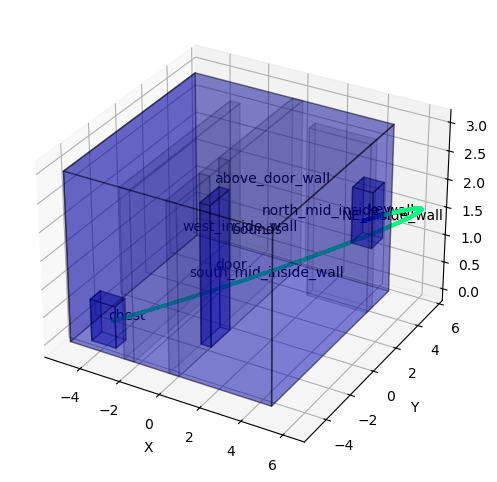

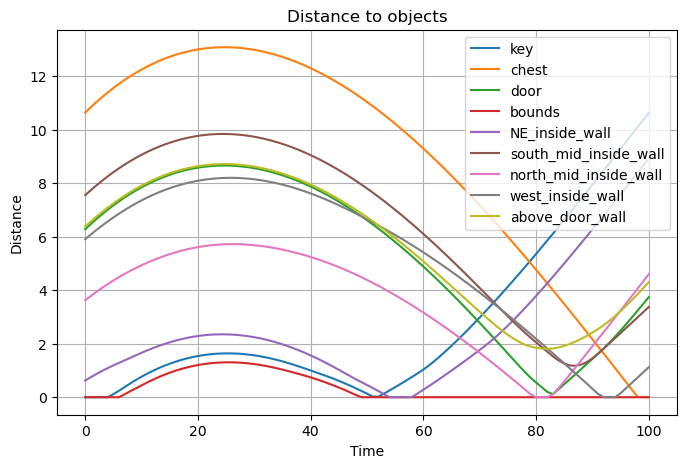

In [7]:
previous_messages = []
for i in range(3):
    messages, status = translator.gpt_conversation(previous_messages=previous_messages)
    if status == "exited":
        break
    spec = translator.get_specs(messages)
    solver = STLSolver(spec, objects, x0, T_max)
    x,u = solver.generate_trajectories(dt, max_acc, max_speed, verbose=True)
    print("x: ", x)
    print("u: ", u)
    animate = False
    visualizer = Visualizer(x, objects, animate=animate)

    if animate:
        gif_name = input("Enter name of GIF file: ")
        visualizer.animate_trajectory(gif_name + ".gif")

    visualizer.visualize_trajectory()
    visualizer.plot_distance_to_objects()
    
    plt.show()
    previous_messages = messages
    x0 = x[:,-1]